In [3]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import pickle

In [4]:
df = pd.read_csv('df_out.csv')
df.shape

(10000, 20)

In [5]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
4,7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [6]:
df.duplicated().describe()

count     10000
unique        1
top       False
freq      10000
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10000 non-null  int64  
 1   url             10000 non-null  object 
 2   region          10000 non-null  object 
 3   region_url      10000 non-null  object 
 4   price           10000 non-null  int64  
 5   year            9964 non-null   float64
 6   manufacturer    10000 non-null  object 
 7   model           9872 non-null   object 
 8   fuel            9937 non-null   object 
 9   odometer        10000 non-null  int64  
 10  title_status    9834 non-null   object 
 11  transmission    9955 non-null   object 
 12  image_url       9998 non-null   object 
 13  description     9998 non-null   object 
 14  state           10000 non-null  object 
 15  lat             9902 non-null   float64
 16  long            9902 non-null   float64
 17  posting_date    9998 non-null   

In [8]:
print(f"Полностью заполнены: {len(df.dropna())/len(df)*100}%")

Полностью заполнены: 95.07%


In [9]:
df = df.dropna()

In [10]:
df.dtypes

id                  int64
url                object
region             object
region_url         object
price               int64
year              float64
manufacturer       object
model              object
fuel               object
odometer            int64
title_status       object
transmission       object
image_url          object
description        object
state              object
lat               float64
long              float64
posting_date       object
price_category     object
date               object
dtype: object

In [11]:
df['date'] = pd.to_datetime(df['date'])
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True)
df['year'] = df['year'].astype('int')
df['fuel'] = df['fuel'].astype('category')
df['title_status'] = df['title_status'].astype('category')
df['transmission'] = df['transmission'].astype('category')
df['state'] = df['state'].astype('category')
df['price_category'] = df['price_category'].astype('category')

In [12]:
df.dtypes

id                              int64
url                            object
region                         object
region_url                     object
price                           int64
year                            int32
manufacturer                   object
model                          object
fuel                         category
odometer                        int64
title_status                 category
transmission                 category
image_url                      object
description                    object
state                        category
lat                           float64
long                          float64
posting_date      datetime64[ns, UTC]
price_category               category
date              datetime64[ns, UTC]
dtype: object

In [13]:
df.describe()

,id,price,year,odometer,lat,long
count,9.507000e+03,9507.000000,9507.000000,9507.000000,9507.000000,9507.000000
mean,7.311560e+09,19382.554644,2011.023877,93570.814768,38.592927,-93.957723
std,4.368563e+06,18328.499851,9.466994,63242.739535,5.837483,18.028733
min,7.301586e+09,500.000000,1915.000000,0.000000,-67.144243,-158.069300
25%,7.308186e+09,7836.500000,2008.000000,39244.000000,34.874932,-107.978513
50%,7.312782e+09,15900.000000,2013.000000,89000.000000,39.290100,-87.960000
75%,7.315292e+09,27990.000000,2017.000000,137054.500000,42.417300,-80.719038
max,7.317090e+09,1000000.000000,2022.000000,283466.000000,64.947500,173.885502


In [14]:
def calc_boundaries(data):
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)
    return boundaries

def is_outlier(boundaries, value):
    return (value < boundaries[0]) | (value > boundaries[1])


Text(0, 0.5, 'Количество')

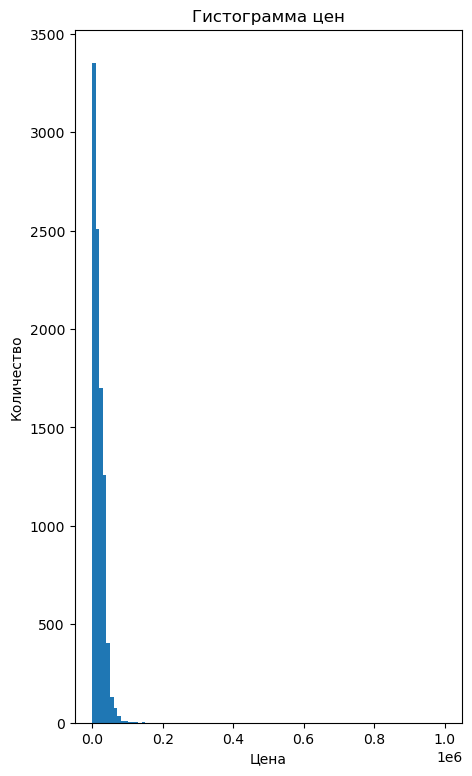

In [15]:
plt.figure(figsize=(5, 9))
plt.hist(df['price'], bins=100)
plt.title('Гистограмма цен')
plt.xlabel('Цена')
plt.ylabel('Количество')

In [16]:
price_boundaries = calc_boundaries(df['price'])
df = df.drop(df[is_outlier(price_boundaries, df['price'])].index)

Text(0, 0.5, 'Количество')

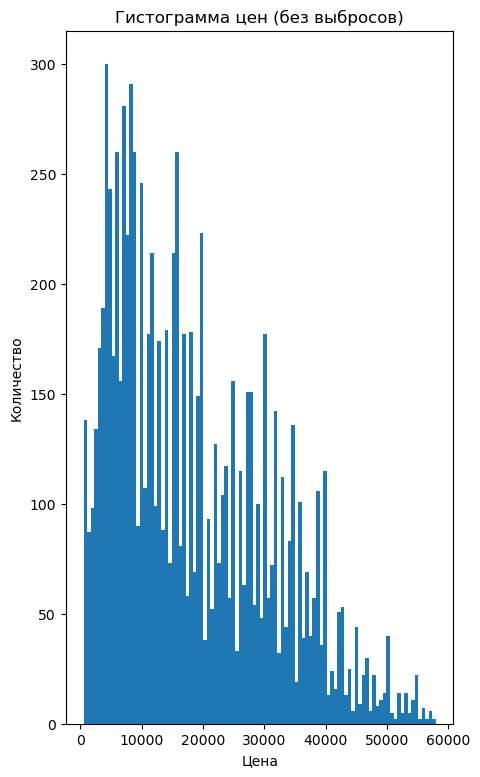

In [17]:
plt.figure(figsize=(5, 9))
plt.hist(df['price'], bins=100)
plt.title('Гистограмма цен (без выбросов)')
plt.xlabel('Цена')
plt.ylabel('Количество')

In [18]:
df['model'].value_counts()

model
f-150                        142
silverado 1500               106
1500                          99
camry                         76
silverado                     72
                            ... 
encore sport touring           1
e-150 reefer cargo van         1
mazda6i                        1
a7 premium plus sedan 4d       1
a3 2.0t premium plus pzev      1
Name: count, Length: 3239, dtype: int64

In [19]:
df['short_model'] = df.apply(lambda x: x.model.split()[0],axis=1)
df['short_model'].value_counts()

short_model
silverado    389
1500         202
wrangler     199
grand        194
f-150        192
            ... 
s3             1
neon           1
stinger        1
IC             1
gs350          1
Name: count, Length: 943, dtype: int64

In [20]:
df['age_category'] = df.apply(lambda x: 'ancient' if x.year < 1990 else ('old' if x.year < 2006 else ('new' if x.year > 2013 else 'average')), axis=1)
df['age_category'].value_counts()

age_category
new        4412
average    3374
old        1274
ancient     266
Name: count, dtype: int64

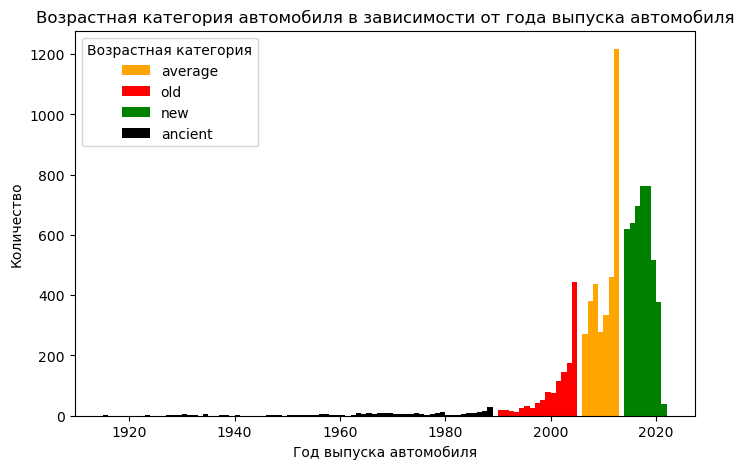

In [21]:
colors = {'average': 'orange', 'old': 'red', 'new': 'green', 'ancient': 'black'}

fig, ax = plt.subplots(figsize=(8, 5))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.hist(data['year'], color=color, bins=data['year'].max() - data['year'].min())
    
plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория")

In [22]:
columns_onehot = ['short_model', 'transmission', 'region', 'manufacturer', 'state', 'title_status', 'age_category', 'fuel']
print('Количество уникальных значений')
for col in columns_onehot:
    print(f'{col}: {df[col].nunique()}')

Количество уникальных значений
short_model: 943
transmission: 3
region: 393
manufacturer: 40
state: 51
title_status: 6
age_category: 4
fuel: 5


In [23]:
data = df[columns_onehot]
ohe = OneHotEncoder(sparse=False)
ohe.fit(data)
matrix = ohe.transform(data)

c:\Users\Yanovich\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
df[ohe.get_feature_names_out()] = matrix

C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\1059123982.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = matrix
C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\1059123982.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[ohe.get_feature_names_out()] = matrix
C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\1059123982.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Con

In [25]:
columns_std = ['year', 'odometer']
data = df[columns_std]
mm_scaler = StandardScaler()
mm_scaler.fit(data)
matrix = mm_scaler.transform(data)

In [26]:
column_names = [col+'_std' for col in columns_std]
df[column_names] = matrix

C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\17036131.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_names] = matrix
C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\17036131.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_names] = matrix


In [27]:
columns_minmax = ['lat', 'long']
data = df[columns_minmax]
mm_scaler = MinMaxScaler()
mm_scaler.fit(data)
matrix = mm_scaler.transform(data)

In [28]:
column_names = [col+'_mm' for col in columns_minmax]
df[column_names] = matrix

C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\1700399522.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_names] = matrix
C:\Users\Yanovich\AppData\Local\Temp\ipykernel_12552\1700399522.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[column_names] = matrix


In [29]:
df.drop(['model'], axis=1, inplace=True)        #сокращено в short_model
df.drop(columns_onehot, axis=1, inplace=True)   #обработано onehot
df.drop(columns_std, axis=1, inplace=True)      #обраотано standart scaler
df.drop(columns_minmax, axis=1, inplace=True)   #обраотано minmax scaler
columns_del = ['id', 'url', 'region_url', 'image_url', 'description', 'posting_date', 'date']
df.drop(columns_del, axis=1, inplace=True)      #неинфоративные фичи
df.drop(['price'], axis=1, inplace=True)        #содержит целевую переменную

In [30]:
x = df.drop(['price_category'], axis=1)
y = df['price_category']

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [32]:
logreg = LogisticRegression(solver='newton-cg', random_state=42)
forest = RandomForestClassifier(random_state=42)
neural = MLPClassifier(random_state=42)

In [33]:
print("Логистическая регрессия")
cross_val_score(logreg, x_train, y_train, cv=4)

Логистическая регрессия


array([0.75306373, 0.75551471, 0.7745098 , 0.74754902])

In [34]:
print("Случайный лес")
cross_val_score(forest, x_train, y_train, cv=4)

Случайный лес


array([0.76102941, 0.76102941, 0.76531863, 0.75551471])

In [35]:
print("МногослойныЙ персептрон")
cross_val_score(neural, x_train, y_train, cv=4)

МногослойныЙ персептрон


c:\Users\Yanovich\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Yanovich\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Yanovich\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\Yanovich\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([0.76654412, 0.75857843, 0.77022059, 0.74571078])

In [36]:
forest.fit(x_train, y_train)
pred = forest.predict(x_test)
print("Точность случайного леса на тестовой выборке:", accuracy_score(y_test, pred))

Точность случайного леса на тестовой выборке: 0.7687634024303074


In [37]:
forest.fit(x, y)

RandomForestClassifier(random_state=42)

In [38]:
filename = 'model.pickle'
with open(filename, 'wb') as file:
    pickle.dump(forest, file)